In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [7]:
cancer = load_breast_cancer()

In [ ]:
'''
Stratify
::
Binary Data 일 때
Target이 25%(0), 75%(1) 이 비율로 유지한 채로
라벨 데이터(y) 분할할 때 사용됨
'''

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify = cancer.target, random_state=42)

In [10]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## 정확도 측정

In [18]:
# 정확도 측정
print('훈련세트 정확도 : {:3f}' .format(tree.score(X_train,y_train)))
print('테스트세트 정확도 : {:3f}' .format(tree.score(X_test,y_test)))

훈련세트 정확도 : 1.000000
테스트세트 정확도 : 0.937063


In [ ]:
# 훈련세트 정확도가 너무 높아 Overfitting 문제 발생

## 가지치기
    기대효과 : 가지치기를 해서 훈련세트 Overfitting 비율은 낮추고 테스트 데이터 정확도를 높이기

In [21]:
# max_depth : 특성 중요도를 살펴봤을 때 depth 4정도가 괜찮다고 판단
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [22]:
# 정확도 재측정
print('훈련세트 정확도 : {:3f}' .format(tree.score(X_train,y_train)))
print('테스트세트 정확도 : {:3f}' .format(tree.score(X_test,y_test)))

훈련세트 정확도 : 0.988263
테스트세트 정확도 : 0.951049


## 특성중요도

In [23]:
'''
트리를 한 번 이상 구성했기 때문에
특성중요도 추출 가능
'''
print('특성중요도 : \n{}' .format(tree.feature_importances_))

특성중요도 : 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


### 특성중요도 시각화

In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# cancer.data.shape[1]

30

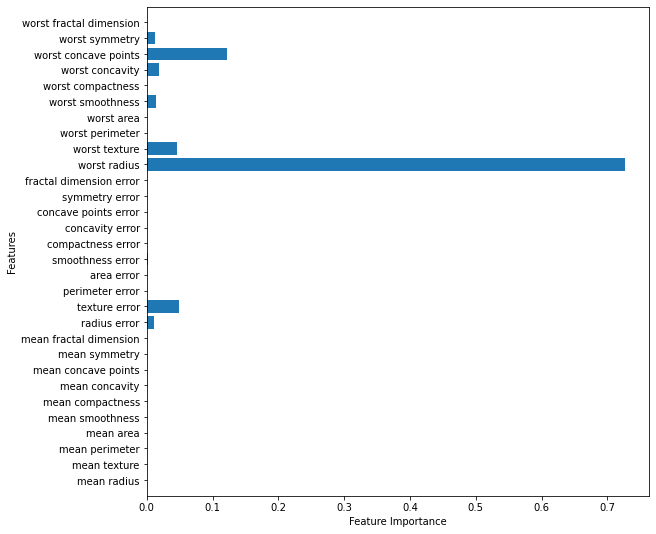

In [32]:
def plot_feature_importances_cancer(model, data) :
    n_feature=data.data.shape[1]
    plt.barh(range(n_feature), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), data.feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.ylim(-1,n_feature)

plt.figure(figsize=(9,9))
plot_feature_importances_cancer(tree, cancer)

## 결정트리시각화

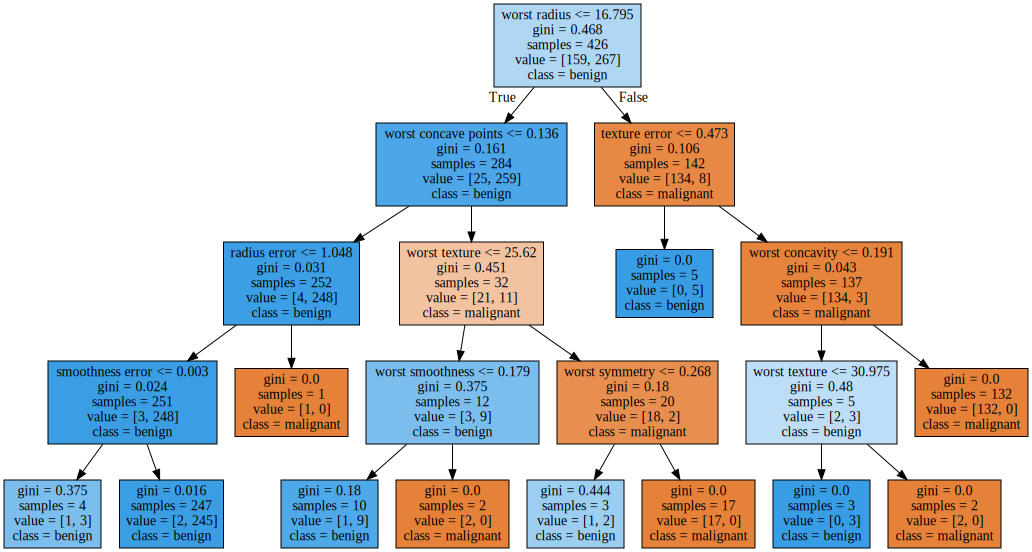

In [33]:
# 일단 .dot라는 파일을 만들고 이를 활용해 시각화함
import graphviz
from sklearn.tree import export_graphviz # 결정트리의 시각화 도구
export_graphviz(tree,out_file='cancer_tree.dot',
                class_names=cancer.target_names, # 가로축 이름
                feature_names=cancer.feature_names, # 세로축 이름.
                filled=True # colorful 여부
               )
with open('cancer_tree.dot',encoding='utf-8') as f:
    dot_graph=f.read()
dot=graphviz.Source(dot_graph) # dot_graph의 source저장
display(dot)